# Разведочный анализ датасета "Поездки на самокатах Т-Банка"

### 1.1 Цель и задачи анализа

**Цель:** выявить паттерны использования самокатов для улучшения сервиса.

**Задачи:**

1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
   - Изучить распределения длительности поездок и стоимости;
   - Исследовать зависимость стоимости от длительности и километража;
   - Исследовать как пол и возраст влияют на количество поездок;
   - Изучить влияние региона на цену поездок;
4. Сформулировать гипотезы для проверки.
5. Проверить гипотезы.
6. Сделать выводы по проведенному анализу

### 1.2 Описание данных

**Названия файла:** `kicksharing.csv`

**Источник:** Данные предоставлены Т-Банком

**Период:** Апрель 2024 - Октябрь 2024

**Описание датасета:**

- `order_rk` - Идентификатор заказа (поездки)
- `party_rk_id` - Идентификатор клиента
- `minute_cost` - Стоимость минуты
- `hold_amount` - Размер суммы, которая замораживается на счете в момент взятия самоката
- `transport_model` - Название модели самоката
- `distance_km` - Километраж поездки
- `created_dttm` - Дата и время создания заказа
- `book_start_dttm` - Дата и время начала поездки
- `book_end_dttm` - Дата и время завершения поездки
- `book_time_zone_cd` - Часовой пояс
- `local_book_start_dttm` - Дата и время начала поездки в часовом поясе человека, который брал самокат
- `nominal_price_rub_amt` - Стоимость поездки
- `loyalty_accrual_rub_amt` - Размер выплаченного кэшбэка в рублях
- `loyalty_accrual_bns_amt` - Размер выплаченного кэшбэка в бонусах (если оплата происходила с помощью кредитной карты)
- `Gender_cd` - Пол клиента
- `Age` - Возраст клиента
- `Education_level` - Уровень образования клиента
- `lvn_state_nm` - Регион проживания человека
- `marital_status_cd` - Семейный статус человека

## 2 Знакомство с данными

### 2.1  Вывод общей информации

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats

In [10]:
df = pd.read_csv(r'C:\Users\svyat\Downloads\kicksharing.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [12]:
df.head(10)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN
5,277397094,5247768,M,42,NaN,NaN,МОСКВА,7.49,50.0,300.0,SL,0.016090,2024-09-10 09:40:18.000000,2024-09-10 09:40:24.036000,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.00,NaN,NaN
6,273528957,801272780,F,19,NaN,NaN,РЕСП ТАТАРСТАН,7.49,30.0,300.0,SL,4.086853,2024-09-03 14:10:29.000000,2024-09-03 14:10:34.524349,2024-09-03 14:21:25.119585,3,2024-09-03 14:10:34.524349,112.39,28.00,NaN
7,265062394,866880584,M,38,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,2.370597,2024-08-03 03:09:35.000000,2024-08-03 03:09:38.493851,2024-08-03 03:18:47.841493,5,2024-08-03 05:09:38.493851,89.90,12.99,NaN
8,351562880,762053500,M,19,NaN,NaN,НОВОСИБИРСКАЯ ОБЛ,5.99,30.0,300.0,E,0.101272,2024-10-04 10:45:16.000000,2024-10-04 10:45:20.457000,2024-10-04 10:47:39.863967,7,2024-10-04 14:45:20.457000,47.97,4.80,NaN
9,269365210,161703813,M,31,UGR,MAR,ЧЕЛЯБИНСКАЯ ОБЛ,6.49,30.0,300.0,E,1.487792,2024-08-19 14:35:17.000000,2024-08-19 14:35:20.199325,2024-08-19 14:42:53.835731,5,2024-08-19 16:35:20.199325,81.92,81.92,NaN


### 2.2 Промежуточный вывод по датасету `df`

Датасет `df` содержит 20 столбцов и 396749 строк.

- 7 столбцов представлены в формате float64, 4 в int64 и 9 в object
- Названия некоторых столбцов начинаются с большой буквы, переведём все названия в нижний регистр
- Пропуски обнаружены в следующих столбцах: `gender_cd`, `education_level_cd`, `marital_status_cd`, `lvn_state_nm`, `loyalty_accrual_rub_amt` и `loyalty_accrual_bns_amt`
- Столбцы `book_start_dttm`, `book_end_dttm` и `created_dttm` содержат даты и должны быть приведены к типу datetime
- В столбце `lvn_state_nm` есть неявные дубликаты: Г МОСКВА и МОСКВА. При анализе дубликатов стоит проверить этот столбец.

## 3 Анализ пропусков и предобработка данных

### 3.1 Меняем типы данных в столбцах, которые хранят значения даты и времени и приводим названия столбцов к нижнему регистру

In [17]:
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])
df['created_dttm'] = pd.to_datetime(df['created_dttm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 396749 non-null  int64         
 1   party_rk                 396749 non-null  int64         
 2   gender_cd                393828 non-null  object        
 3   age                      396749 non-null  int64         
 4   education_level_cd       190059 non-null  object        
 5   marital_status_cd        217729 non-null  object        
 6   lvn_state_nm             362572 non-null  object        
 7   minute_cost              396749 non-null  float64       
 8   activation_cost          396749 non-null  float64       
 9   hold_amount              396749 non-null  float64       
 10  transport_model          396749 non-null  object        
 11  distance_km              396749 non-null  float64       
 12  created_dttm    

In [18]:
# Приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 396749 non-null  int64         
 1   party_rk                 396749 non-null  int64         
 2   gender_cd                393828 non-null  object        
 3   age                      396749 non-null  int64         
 4   education_level_cd       190059 non-null  object        
 5   marital_status_cd        217729 non-null  object        
 6   lvn_state_nm             362572 non-null  object        
 7   minute_cost              396749 non-null  float64       
 8   activation_cost          396749 non-null  float64       
 9   hold_amount              396749 non-null  float64       
 10  transport_model          396749 non-null  object        
 11  distance_km              396749 non-null  float64       
 12  created_dttm    

### 3.2 Анализ пропусков

In [20]:
abs_omissions_df = df.isna().sum()
otn_omissions_df = round(df.isna().sum() / df.shape[0] * 100, 2)
omissions_acquisition_df = pd.DataFrame({
                                         'Абсолютные значения': abs_omissions_df,
                                         'Относительные значения (%)': otn_omissions_df
                                        })
omissions_acquisition_df

,Абсолютные значения,Относительные значения (%)
order_rk,0,0.00
party_rk,0,0.00
gender_cd,2921,0.74
age,0,0.00
education_level_cd,206690,52.10
marital_status_cd,179020,45.12
lvn_state_nm,34177,8.61
minute_cost,0,0.00
activation_cost,0,0.00
hold_amount,0,0.00


Обнаружены пропуски в следующих столбцах:

1) `education_level_cd` и `marital_status_cd` обнаружено 52.10% и 45.12% пропусков.


    Такое большое количество пропусков может быть связано с тем, что информация с уровнем образования и семейным положением не обязательна для заполнения. Данные столбцы не будут использоваться при дальнейшем анализе, так что заменим их на значение-индикатор unknown.

2) В столбце с полом `gender_cd` обнаружено 0.74% пропусков.

    Они могут быть связаны с тем, что данные потерялись, например, во время технического сбоя. Мы их удалим, так как данное количество пропусков является малым и их удаление не повлияет на репрезентативность данных.

3) В столбце `lvn_state_nm` содержится 8.61% пропусков. Заменим их на значение-индикатор unknown

4) В столбцах с кэмбеком `loyalty_accrual_rub_amt` и `loyalty_accrual_bns_amt` обнаружено соответственно 7.50% и 94.47%

    Пропуски в данных столбцах означают, что кэшбека на некоторые поездки не было. Несмотря на большой процент пропусков в столбце `loyalty_accrual_bns_amt`, это может быть нормально, так как кэшбек бонусами начислялся только тогда, когда оплата
происходила с помощью кредитной карты. Заменим пропуски в этих столбцах на 0.

### 3.3 Обработка пропусков

In [23]:
# удаляем пропуски в столбце gender_cd
df.dropna(subset=['gender_cd'], inplace=True)

# заменяем пропуски в столбце lvn_state_nm
df['lvn_state_nm'] = df['lvn_state_nm'].fillna('unknown')
df['education_level_cd'] = df['education_level_cd'].fillna('unknown')
df['marital_status_cd'] = df['marital_status_cd'].fillna('unknown')

# заменяем пропуски в столбцах loyalty_accrual_rub_amt и loyalty_accrual_bns_amt
df['loyalty_accrual_rub_amt'] = df['loyalty_accrual_rub_amt'].fillna(0)
df['loyalty_accrual_bns_amt'] = df['loyalty_accrual_bns_amt'].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393828 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 393828 non-null  int64         
 1   party_rk                 393828 non-null  int64         
 2   gender_cd                393828 non-null  object        
 3   age                      393828 non-null  int64         
 4   education_level_cd       393828 non-null  object        
 5   marital_status_cd        393828 non-null  object        
 6   lvn_state_nm             393828 non-null  object        
 7   minute_cost              393828 non-null  float64       
 8   activation_cost          393828 non-null  float64       
 9   hold_amount              393828 non-null  float64       
 10  transport_model          393828 non-null  object        
 11  distance_km              393828 non-null  float64       
 12  created_dttm         

После обработки пропусков в датасете осталось 393828 строк

### 3.4 Обработка явных и неявных дубликатов

#### 3.4.1 Явные дубликаты

In [27]:
df.duplicated().sum()

0

In [28]:
df['order_rk'].duplicated().sum()

0

Явных дубликатов не обнаружено

#### 3.4.2 Неявные дубликаты

In [31]:
df['lvn_state_nm'].unique()

array(['ТЮМЕНСКАЯ ОБЛ', 'РОСТОВСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛ', 'Г МОСКВА',
       'МОСКВА', 'РЕСП ТАТАРСТАН', 'НОВОСИБИРСКАЯ ОБЛ', 'ЧЕЛЯБИНСКАЯ ОБЛ',
       'unknown', 'НИЖЕГОРОДСКАЯ ОБЛ', 'КРАСНОДАРСКИЙ КРАЙ',
       'МОСКОВСКАЯ ОБЛ', 'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС',
       'КРАСНОЯРСКИЙ КРАЙ', 'СМОЛЕНСКАЯ ОБЛ', 'ИРКУТСКАЯ ОБЛ',
       'ОРЛОВСКАЯ ОБЛ', 'Г САНКТ-ПЕТЕРБУРГ', 'РЕСП БАШКОРТОСТАН',
       'ПСКОВСКАЯ ОБЛ', 'ВОЛОГОДСКАЯ ОБЛ', 'РЕСП МАРИЙ ЭЛ',
       'ВОРОНЕЖСКАЯ ОБЛ', 'САМАРСКАЯ ОБЛ', 'АСТРАХАНСКАЯ ОБЛ',
       'БЕЛГОРОДСКАЯ ОБЛ', 'АЛТАЙСКИЙ КРАЙ', 'ЛИПЕЦКАЯ ОБЛ',
       'САРАТОВСКАЯ ОБЛ', 'ЛЕНИНГРАДСКАЯ ОБЛ', 'ПЕРМСКИЙ КРАЙ',
       'САХАЛИНСКАЯ ОБЛ', 'РЕСП УДМУРТСКАЯ', 'РЕСП КРЫМ',
       'КАЛИНИНГРАДСКАЯ ОБЛ', 'ТВЕРСКАЯ ОБЛ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ', 'УДМУРТСКАЯ РЕСП',
       'ИВАНОВСКАЯ ОБЛ', 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО',
       'ПРИМОРСКИЙ КРАЙ', 'ВОЛГОГРАДСКАЯ ОБЛ', 'Г СЕВАСТОПОЛЬ',
       'ТОМСКАЯ ОБЛ', 'РЕСП ЧЕЧЕН

Большое количество неявных дубликатов обнаружено в столбце `lvn_state_nm`

In [33]:
# функция для областей
def format_region_name(region_name):
    if pd.isna(region_name):
        return region_name
    
    # Приводим к нижнему регистру для удобства проверки
    region_lower = region_name.lower()
    
    # Если начинается с "обл " , "обл. "или "область " → перемещаем в конец
    if region_lower.startswith(('обл ', 'область ', 'обл. ')):
        # Удаляем "обл " / "область " и добавляем " обл" в конец
        name_part = re.sub(r'^(обл|область|обл.)\s+', '', region_name, flags=re.IGNORECASE)
        return f"{name_part.strip()} обл"
    
    # Если заканчивается на " область" → заменяем на " обл"
    elif region_lower.endswith(' область'):
        return re.sub(r'\s+область$', ' обл', region_name, flags=re.IGNORECASE)
    
    # Если уже в правильном формате (напр., "Москва" или "Татарстан") — оставляем как есть
    else:
        return region_name

In [34]:
# функция для городов
def clean_city_name(city_name):
    if pd.isna(city_name):
        return city_name
    
    # Приводим к нижнему регистру для унификации проверки
    city_lower = str(city_name).lower()
    
    # Удаляем указатели города в начале (г, г., город)
    city_cleaned = re.sub(
        r'^(г|г\.|город)(\s+|$)', 
        '', 
        city_name, 
        flags=re.IGNORECASE
    ).strip()
    
    # Удаляем указатели города в конце (г, г., город)
    city_cleaned = re.sub(
        r'(\s+|^)(г|г\.|город)$', 
        '', 
        city_cleaned, 
        flags=re.IGNORECASE
    ).strip()
    
    return city_cleaned if city_cleaned else city_name  # Возвращаем исходное значение, если после очистки получилась пустая строка

In [35]:
# функция для республик
def format_republic_name(region_name):
    if pd.isna(region_name):
        return region_name
    
    # Приводим к нижнему регистру для унификации
    region_lower = str(region_name).lower()
    
    # Обрабатываем случаи, где республика указана в начале (Респ / Респ. / Рус)
    if re.match(r'^(респ|респ\.|русп)\s+', region_lower):
        # Извлекаем название без префикса
        name_part = re.sub(r'^(респ|респ\.|русп)\s+', '', region_name, flags=re.IGNORECASE)
        return f"Республика {name_part.strip()}"
   
    # Обрабатываем случаи, где республика указана в конце
    elif re.search(r'\s(респ|респ\.)$', region_lower):
        # Извлекаем название без суффикса
        name_part = re.sub(r'\s(респ|респ\.)$', '', region_name, flags=re.IGNORECASE)
        return f"Республика {name_part.strip()}"
    
    # Если уже в формате "Республика Название" → оставляем как есть
    elif 'республика' in region_lower:
        return region_name
    
    # Для всех остальных случаев возвращаем исходное значение
    else:
        return region_name

In [36]:
# функция для краев
def format_krai_name(name):
    if pd.isna(name):
        return name
    
    # Приводим к нижнему регистру для проверки
    name_lower = str(name).lower().strip()
    
    # Если "край" в начале - перемещаем в конец
    if re.match(r'^(край|край\.)\s+', name_lower):
        name_cleaned = re.sub(r'^(край|край\.)\s+', '', name, flags=re.IGNORECASE)
        return f"{name_cleaned.strip()} край"
    
    # Если "край" в конце без пробела - добавляем пробел
    elif re.search(r'(?<!\s)край$', name_lower):
        return re.sub(r'край$', ' край', name, flags=re.IGNORECASE)
    
    # Если "край" уже правильно оформлен - оставляем как есть
    elif re.search(r'\sкрай$', name_lower):
        return name
    
    # Все остальные случаи
    else:
        return name

In [37]:
df['lvn_state_nm'] = df['lvn_state_nm'].apply(format_region_name)
df['lvn_state_nm'] = df['lvn_state_nm'].apply(clean_city_name)
df['lvn_state_nm'] = df['lvn_state_nm'].apply(format_republic_name)
df['lvn_state_nm'] = df['lvn_state_nm'].apply(format_krai_name)
df['lvn_state_nm'] = df['lvn_state_nm'].str.lower()
# сделаем первую букву заглавной
df['lvn_state_nm'] = df['lvn_state_nm'].str.capitalize()
df['lvn_state_nm'] = df['lvn_state_nm'].str.replace('Чувашия чувашская республика -', 'Республика чувашская', regex=True)
df.head(10)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,Тюменская обл,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0
1,355113920,614049469,F,30,GRD,MAR,Ростовская обл,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,0.0
2,347424551,757583701,M,28,UGR,UNM,Свердловская обл,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,0.0
3,351562959,541367366,M,24,GRD,UNM,Москва,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,0.0
4,258647149,238473615,M,34,unknown,unknown,Москва,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,0.0
5,277397094,5247768,M,42,unknown,unknown,Москва,7.49,50.0,300.0,SL,0.016090,2024-09-10 09:40:18,2024-09-10 09:40:24.036000,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.00,0.00,0.0
6,273528957,801272780,F,19,unknown,unknown,Республика татарстан,7.49,30.0,300.0,SL,4.086853,2024-09-03 14:10:29,2024-09-03 14:10:34.524349,2024-09-03 14:21:25.119585,3,2024-09-03 14:10:34.524349,112.39,28.00,0.0
7,265062394,866880584,M,38,unknown,unknown,Свердловская обл,5.99,30.0,300.0,E,2.370597,2024-08-03 03:09:35,2024-08-03 03:09:38.493851,2024-08-03 03:18:47.841493,5,2024-08-03 05:09:38.493851,89.90,12.99,0.0
8,351562880,762053500,M,19,unknown,unknown,Новосибирская обл,5.99,30.0,300.0,E,0.101272,2024-10-04 10:45:16,2024-10-04 10:45:20.457000,2024-10-04 10:47:39.863967,7,2024-10-04 14:45:20.457000,47.97,4.80,0.0
9,269365210,161703813,M,31,UGR,MAR,Челябинская обл,6.49,30.0,300.0,E,1.487792,2024-08-19 14:35:17,2024-08-19 14:35:20.199325,2024-08-19 14:42:53.835731,5,2024-08-19 16:35:20.199325,81.92,81.92,0.0


In [38]:
df['lvn_state_nm'].unique()

array(['Тюменская обл', 'Ростовская обл', 'Свердловская обл', 'Москва',
       'Республика татарстан', 'Новосибирская обл', 'Челябинская обл',
       'Unknown', 'Нижегородская обл', 'Краснодарский край',
       'Московская обл', 'Кемеровская область - кузбасс',
       'Красноярский край', 'Смоленская обл', 'Иркутская обл',
       'Орловская обл', 'Санкт-петербург', 'Республика башкортостан',
       'Псковская обл', 'Вологодская обл', 'Республика марий эл',
       'Воронежская обл', 'Самарская обл', 'Астраханская обл',
       'Белгородская обл', 'Алтайский край', 'Липецкая обл',
       'Саратовская обл', 'Ленинградская обл', 'Пермский край',
       'Сахалинская обл', 'Республика удмуртская', 'Республика крым',
       'Калининградская обл', 'Тверская обл', 'Ставропольский край',
       'Республика северная осетия - алания', 'Ивановская обл',
       'Ханты-мансийский автономный округ - югра ао', 'Приморский край',
       'Волгоградская обл', 'Севастополь', 'Томская обл',
       'Республик

Большинство неявных дубликатов в столбце `lvn_state_nm` были обработаны. Оставшееся количество мало и не повлияет на будущий анализ

## 4 Анализ данных и поиск инсайтов

### 4.1 Изучение распределений длительности поездок и стоимости

Добавим в датасет столбец, который будет содержать длительность поездок в минутах

In [43]:
df['duration'] = round((df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60, 2)
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,duration
0,266071307,761067705,M,40,UGR,DIV,Тюменская обл,4.99,30.0,300.0,...,3.690479,2024-08-07 09:47:25,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0,20.50
1,355113920,614049469,F,30,GRD,MAR,Ростовская обл,8.49,50.0,300.0,...,1.114912,2024-10-17 14:57:20,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,0.0,6.91
2,347424551,757583701,M,28,UGR,UNM,Свердловская обл,5.99,30.0,300.0,...,1.515612,2024-09-19 05:31:41,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,0.0,6.84
3,351562959,541367366,M,24,GRD,UNM,Москва,8.99,50.0,300.0,...,0.499411,2024-10-04 16:05:09,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,0.0,2.31
4,258647149,238473615,M,34,unknown,unknown,Москва,6.99,50.0,300.0,...,2.602028,2024-07-10 06:57:40,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,0.0,10.09


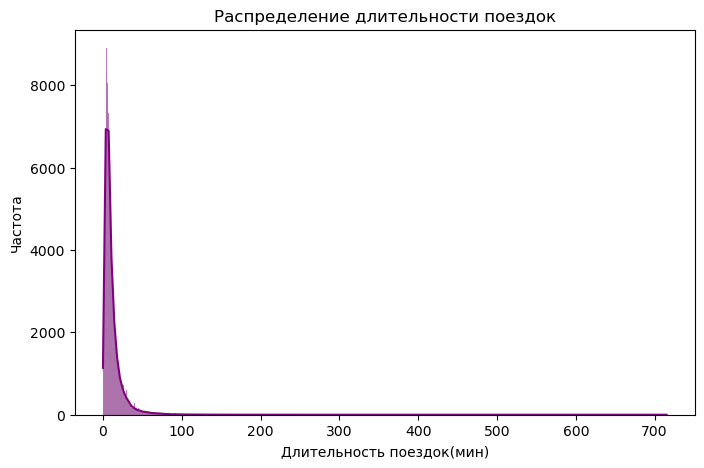

In [44]:
plt.figure(figsize=(8,5))

sns.histplot(df['duration'],
             kde=True,
             color='purple'
            )

plt.title('Распределение длительности поездок')
plt.xlabel('Длительность поездок(мин)')
plt.ylabel('Частота')

plt.show()

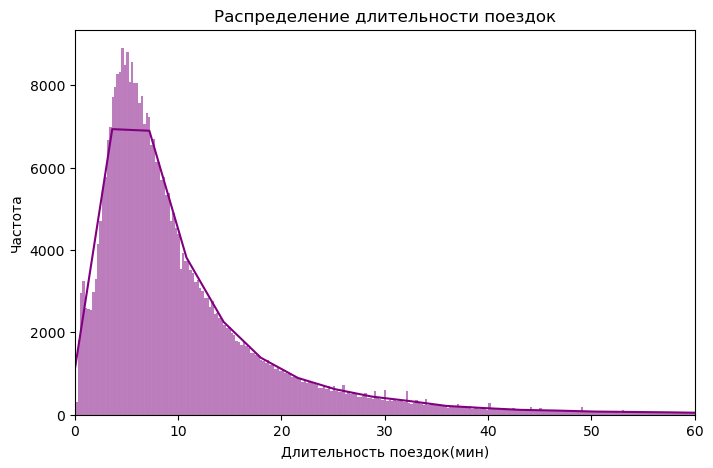

In [45]:
plt.figure(figsize=(8,5))

sns.histplot(df['duration'],
             kde=True,
             color='purple'
            )

plt.xlim(0,60)
plt.title('Распределение длительности поездок')
plt.xlabel('Длительность поездок(мин)')
plt.ylabel('Частота')

plt.show()

In [46]:
df['duration'].median()

7.78

Графики демонстрируют, что значительно преобладают короткие поездки длительностью менее 20 минут. Медиана составляют 7.78 минут, а пик по количеству поездок приходится на промежуток от 5 до 8 минут. Но также встречаются аномально долгие поездки длительностью более 200 минут. Возможно, некоторые люди просто забывали завершить поездку.

In [48]:
# Уберем поездки длительностью более 200 минут из данных
df_filters = df[df['duration'] < 200]
result = df.shape[0] - df_filters.shape[0]
result

110

В результате в новом датафрейме были удалены данные о 110 поездказ

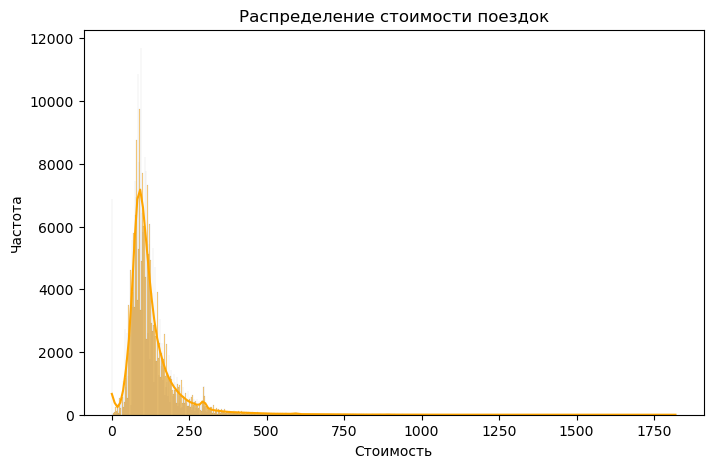

In [50]:
plt.figure(figsize=(8,5))

sns.histplot(df_filters['nominal_price_rub_amt'],
             color='orange',
             kde=True
            )

plt.title('Распределение стоимости поездок')
plt.xlabel('Стоимость')
plt.ylabel('Частота')

plt.show()

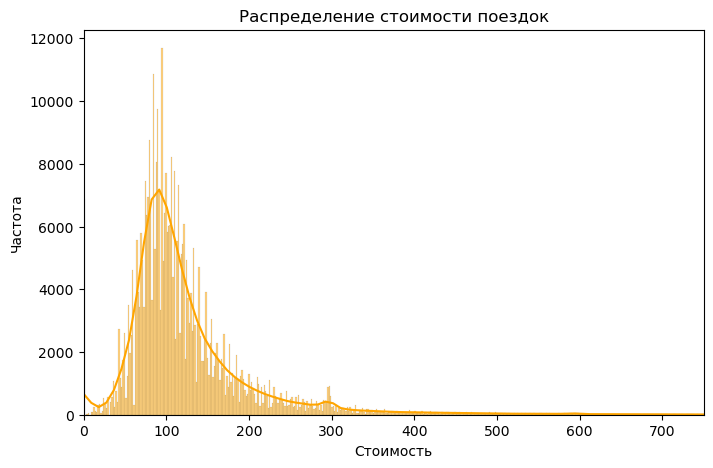

In [51]:
plt.figure(figsize=(8,5))

sns.histplot(df_filters['nominal_price_rub_amt'],
             color='orange',
             kde=True
            )

plt.xlim(0,750)
plt.title('Распределение стоимости поездок')
plt.xlabel('Стоимость')
plt.ylabel('Частота')

plt.show()

In [52]:
df_filters['nominal_price_rub_amt'].median()

103.94

Медианная стоимость поездки составляет 103,94 рубля, что подтверждается графиками. На графике наблюдается резкий спад частоты после 200 рублей, что указывает на редкое использование дорогих поездок. Большинство поездок сосредоточено в диапазоне от 50 до 150 рублей. Однако также фиксируются аномально дорогие поездки, которые, вероятно, связаны с аномально длительными случаями.

In [54]:
# Уберем данные с аномально большими ценами для дальнейшего анализа
df_filters = df_filters[df_filters['nominal_price_rub_amt'] <= 750]

### 4.2 Вывод о распределенях длительности поездок и стоимости

Распределения демонстрируют четкую зависимость между временем поездки и её стоимостью, что и не удивительно.

Для большинства пользователей сервис остается краткосрочной и дешевым выбором. Основной пик приходится на поездки от 5 до 15 минут, которые соответствуют типичному ценовому диапазону 50-150 рублей. Это стоит учитывать при разработки маркетинговых стратегий.

### 4.3 Исследование зависимости стоимости поездки от длительности и километража

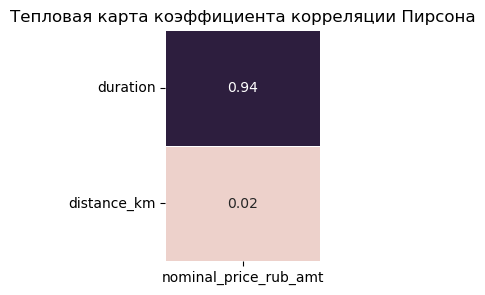

In [58]:
correlation_matrix = df_filters[['nominal_price_rub_amt', 'duration', 'distance_km']].corr()
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'nominal_price_rub_amt'][['nominal_price_rub_amt']].sort_values(by='nominal_price_rub_amt', ascending=False)

plt.figure(figsize=(2, 3))

sns.heatmap(data_heatmap,
            cmap=sns.cubehelix_palette(as_cmap=True),
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            cbar=False
           )

plt.title('Тепловая карта коэффициента корреляции Пирсона')
plt.yticks(rotation=0)

plt.show()

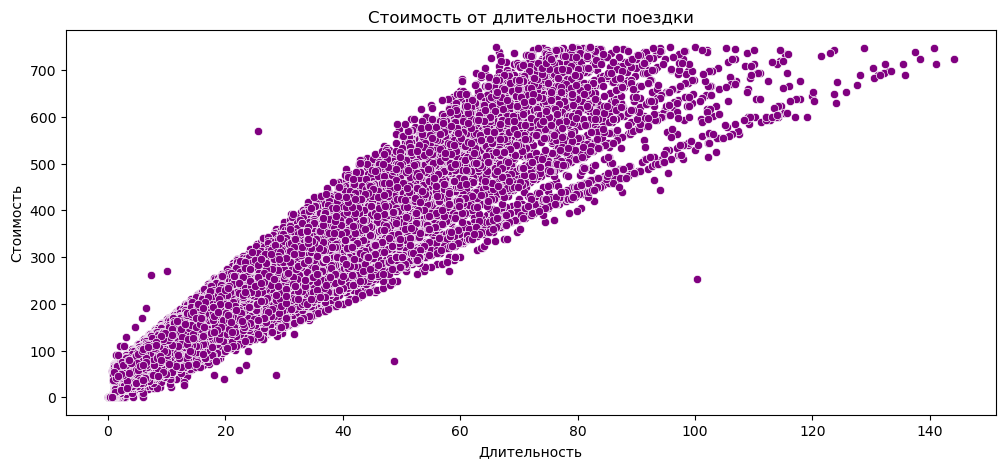

In [59]:
plt.figure(figsize=(12, 5))

sns.scatterplot(data=df_filters,
                x='duration',
                y='nominal_price_rub_amt',
                color='purple'
               )

plt.title('Стоимость от длительности поездки')
plt.xlabel('Длительность')
plt.ylabel('Стоимость')

plt.show()

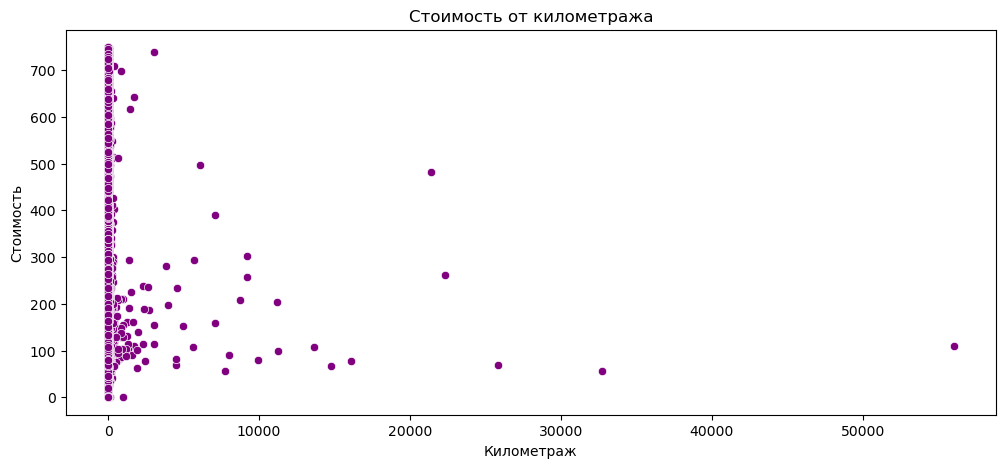

In [60]:
plt.figure(figsize=(12, 5))

sns.scatterplot(data=df_filters,
                x='distance_km',
                y='nominal_price_rub_amt',
                color='purple'
               )

plt.title('Стоимость от километража')
plt.xlabel('Километраж')
plt.ylabel('Стоимость')

plt.show()

In [61]:
df_anomal = df_filters[df_filters['distance_km'] > 20000]
df_anomal.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,duration
11244,252634726,695658540,M,23,SCH,UNM,Ярославская обл,4.99,30.0,300.0,...,56012.640308,2024-06-09 00:01:35,2024-06-09 00:01:38.297341,2024-06-09 00:17:38.340000,3,2024-06-09 00:01:38.297341,109.84,10.98,0.0,16.00
175173,261054571,293397690,M,30,UGR,UNM,Республика мордовия,8.49,30.0,300.0,...,32742.764788,2024-07-19 13:11:27,2024-07-19 13:11:31.981187,2024-07-19 13:14:31.402906,3,2024-07-19 13:11:31.981187,55.47,7.55,0.0,2.99
300080,355425512,865803190,M,31,unknown,unknown,Unknown,8.49,50.0,300.0,...,22317.776290,2024-10-18 12:38:52,2024-10-18 12:38:57.624000,2024-10-18 13:03:44.795520,3,2024-10-18 12:38:57.624000,262.25,48.90,0.0,24.79
313313,274439844,58660326,M,34,GRD,MAR,Московская обл,6.53,50.0,300.0,...,25834.347823,2024-09-06 07:23:50,2024-09-06 07:23:54.260000,2024-09-06 07:26:38.857011,3,2024-09-06 07:23:54.260000,69.59,13.92,0.0,2.74
385466,266073524,70699616,M,46,GRD,MAR,Москва,8.49,50.0,300.0,...,21402.841155,2024-08-07 13:38:24,2024-08-07 13:38:29.075803,2024-08-07 14:29:19.592234,3,2024-08-07 13:38:29.075803,482.99,72.30,0.0,50.84


### 4.4 Вывод о зависимости стоимости поездки от длительности и километража

Анализ показал сильную линейную связь между стоимостью поездки и длительностью (коэффициент 0.94). Это означает, что чем дольше длится поездка, тем выше её стоимость, что логично для поминутного тарифа. Эта зависимость явно подтверждается графиком рассеяния.

Также в ходе анализа была выявлена слабая связь цены с расстоянием. Это подтвеждает график рассеяния для данных величин. На этом графике ещё можно заметить аномальные значения для расстояния(более 5000 км), что наверняка является системным сбоем.

Таким образом, можно сделать вывод, то тарифная политика компании зависит от времени аренды и не учитывает пройденное расстояние.

### 4.5 Исследование влияния пола и возраста на количество поездок.

In [65]:
# разделим людей по возростным группам
df_filters['age_group'] = pd.cut(df_filters['age'], bins=[0, 18, 30, 45, 60, 100], labels=['до 18', '18-30', '31-45', '46-60', '60+'])
df_filters.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,duration,age_group
0,266071307,761067705,M,40,UGR,DIV,Тюменская обл,4.99,30.0,300.0,...,2024-08-07 09:47:25,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0,20.50,31-45
1,355113920,614049469,F,30,GRD,MAR,Ростовская обл,8.49,50.0,300.0,...,2024-10-17 14:57:20,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,0.0,6.91,18-30
2,347424551,757583701,M,28,UGR,UNM,Свердловская обл,5.99,30.0,300.0,...,2024-09-19 05:31:41,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,0.0,6.84,18-30
3,351562959,541367366,M,24,GRD,UNM,Москва,8.99,50.0,300.0,...,2024-10-04 16:05:09,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,0.0,2.31,18-30
4,258647149,238473615,M,34,unknown,unknown,Москва,6.99,50.0,300.0,...,2024-07-10 06:57:40,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,0.0,10.09,31-45


In [66]:
# рассчитаем количество поездок для каждой группы в разрезе пола(нет блин потолка)

count_trips = df_filters.groupby(['age_group', 'gender_cd']).size().unstack()
count_trips

C:\Users\svyat\AppData\Local\Temp\ipykernel_17624\3704460385.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_trips = df_filters.groupby(['age_group', 'gender_cd']).size().unstack()


gender_cd,F,M
age_group,,
до 18,1929,13064
18-30,25563,154264
31-45,23101,145585
46-60,5208,20186
60+,2277,1349


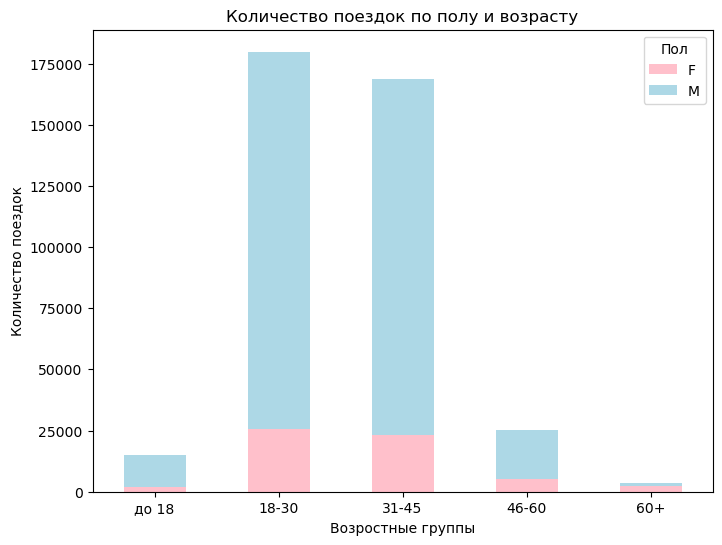

In [67]:
count_trips.plot(kind='bar',
                 rot=0,
                 stacked=True,
                 color=['pink','lightblue'],
                 figsize=(8,6)
                )

plt.title('Количество поездок по полу и возрасту')
plt.xlabel('Возростные группы')
plt.ylabel('Количество поездок')
plt.legend(title='Пол')

plt.show()

### 4.6 Вывод о влияния пола и возраста на количество поездок

Основная аудитория сервиса - люди в возрасте от 18 до 45 лет. Пик приходится на группу с возрастом 18-30 лет, с увеличением возраста активность снижается, а среди подростков(до 18 лет) и пожилых людей(60+) количество поездок минимальны.

Во всех возростных группах количество пользователей мужского пола гораздо больше, чем женского(мужчин больше в 4-5 раз). Кроме людей в возрасте 60+. В этой возрастной группе по количеству поездок лидируют женщины.

Маркетинговый акцент стоит делать на людей в возрасте 18-45 лет, также стоит изучить причины низкой активности среди женщин.

### 4.7 Изучение влияния региона на цену поездок

In [71]:
# среднее значение
df_filters['nominal_price_rub_amt'].mean()

124.5818911103978

In [72]:
# рассчитаем среднию цену поездок в разрезе регионов, в тех регионах, где количество поездок больше 100 
# (пусть > 100 поездок - будет критерием, который характеризует активность региона, также с помощью этого мы сможем убрать неявные дубликаты, которые не были обработаны)
# также уберем данные, где регион не известен
df_filters = df_filters[df_filters['lvn_state_nm'] != 'Unknown']
reg_df = df_filters.groupby('lvn_state_nm').agg(
                                               cont_trips=('duration', 'count'),
                                               mean_price=('nominal_price_rub_amt', 'mean')
                                              ).reset_index()
reg_df = reg_df[reg_df['cont_trips'] > 100]

reg_df = reg_df.sort_values(by='mean_price', ascending=False)

reg_df.head(30)

,lvn_state_nm,cont_trips,mean_price
25,Камчатский край,305,171.849902
34,Курская обл,232,168.212845
30,Костромская обл,376,159.580479
76,Республика карелия,485,159.419588
14,Вологодская обл,1306,158.536011
6,Архангельская обл,844,157.383472
114,Хабаровский край,761,155.390986
12,Владимирская обл,1220,154.040033
71,Республика донецкая народная,287,153.191289
83,Республика северная осетия - алания,385,153.043065


In [73]:
mos_df = reg_df[reg_df['lvn_state_nm']=='Москва']
mos_df

,lvn_state_nm,cont_trips,mean_price
43,Москва,92493,127.981106


In [74]:
spb_df = reg_df[reg_df['lvn_state_nm']=='Санкт-петербург']
spb_df

,lvn_state_nm,cont_trips,mean_price
95,Санкт-петербург,37580,125.678199


In [75]:
# выделим топ-15 по средней цене поездок
top_df = reg_df.head(15)
top_df

,lvn_state_nm,cont_trips,mean_price
25,Камчатский край,305,171.849902
34,Курская обл,232,168.212845
30,Костромская обл,376,159.580479
76,Республика карелия,485,159.419588
14,Вологодская обл,1306,158.536011
6,Архангельская обл,844,157.383472
114,Хабаровский край,761,155.390986
12,Владимирская обл,1220,154.040033
71,Республика донецкая народная,287,153.191289
83,Республика северная осетия - алания,385,153.043065


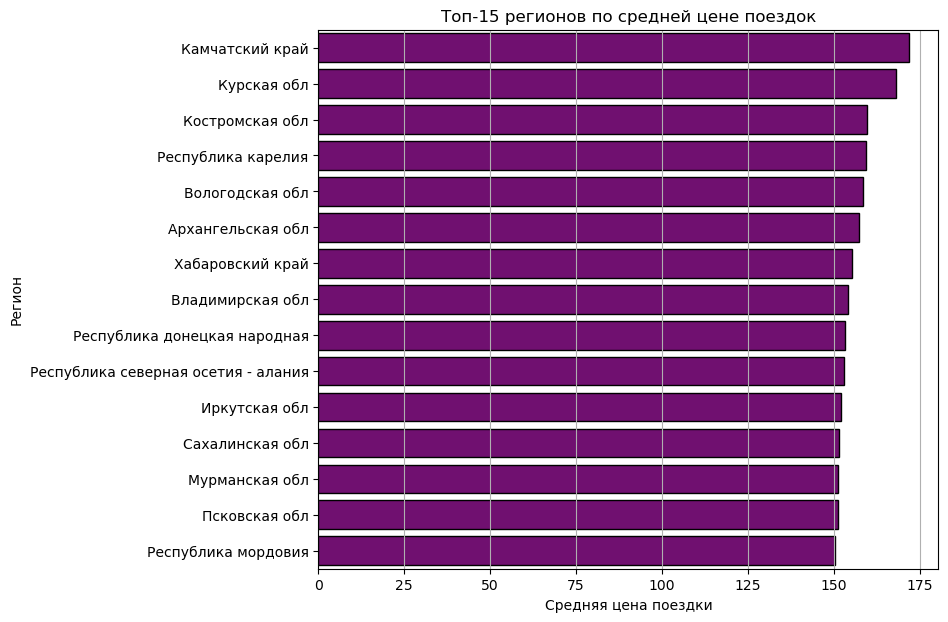

In [76]:
plt.figure(figsize=(8,7))

sns.barplot(data=top_df,
            x = 'mean_price',
            y = 'lvn_state_nm',
            color='purple',
            edgecolor='black',
           )

plt.title('Топ-15 регионов по средней цене поездок')
plt.xlabel('Средняя цена поездки')
plt.ylabel('Регион')

plt.grid(axis = 'x')

plt.show()

### 4.8 Вывод о влиянии региона на цену поездок

Анализ показал, что в среднем цены выше в тех регионах, где менее развита инфраструктура общественного транспорта. Скорее всего в крупных городах люди используют самокаты, чтобы добраться до общественной остановки, в то время как в регионах на них спокойно можно добрать из пункта А в пункт Б.

В топ-15 регионах высокие показатели по средней цене: 150-175р, в то время как среднее по по этому показателю 124р.Для дальнейшего анализа можно проверить статистическую значимость этих различий

## 5 Гипотезы

### 5.1 Среднее время поездки

**H0:** Поездки в выходные и будни не различаются по длительности. mu1 = mu2

**H1:** Поездки в выходные дни в среднем длиннее, чем в будни. mu1 > mu2

### 5.2 Сравнение возростных групп по среднему времени поездок

**H0:** Средняя длительность поездок молодежи (до 30 лет включительно) такая же, как и у старшего поколения. mu1 = mu2

**H1:** Существует статистически значимая разница в средней времени поездок у молодежи и взрослых. mu1 ≠ mu2

In [139]:
alpha = 0.05

## 6 Проверка гипотез

### 6.1 Среднее время поездки

H0: Поездки в выходные и будни не различаются по длительности. mu1 = mu2

H1: Поездки в выходные дни в среднем длиннее, чем в будни. mu1 > mu2

In [136]:
df['day_of_week'] = df['book_start_dttm'].dt.dayofweek 

weekday = df[df['day_of_week'] < 5]['duration']
weekend = df[df['day_of_week'] >= 5]['duration']

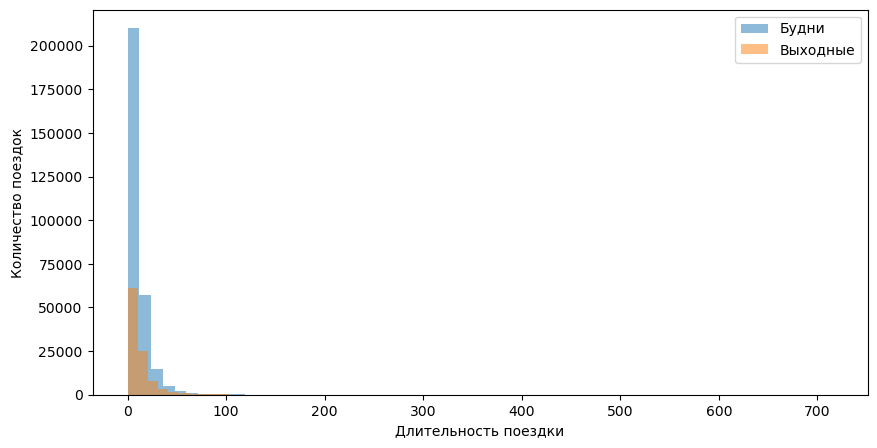

In [189]:
# Гистограмма распределений
plt.figure(figsize=(10, 5))

plt.hist(weekday,
         bins=60,
         alpha=0.5,
         label='Будни')

plt.hist(weekend,
         bins=60,
         alpha=0.5,
         label='Выходные')

plt.xlabel('Длительность поездки')
plt.ylabel('Количество поездок')
plt.legend()

plt.show()

In [165]:
# Проверим гипотезы с помощью теста Манна-Уитни, так распределение ассиметрично
stat, p_value = stats.mannwhitneyu(weekend, weekday, alternative='greater')

if p_value < alpha:
    print(f'Результат U-теста: U = {stat}. Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.')
else:
    print(f'Результат U-теста: U = {stat}. Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.')

Результат U-теста: U = 15882813911.0. Полученное значение p_value=4.07955906664007e-229 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.


In [155]:
weekday_mean = round(weekday.mean(), 2)
weekend_mean = round(weekend.mean(), 2)
diff = round(weekend.mean() - weekday.mean(), 2)
print(f'Средняя длительность поездок в выходные: {weekend_mean} мин')
print(f'Средняя длительность поездок в будни: {weekday_mean} мин')
print(f'В среднем поездки в выходные длиннее на {diff} мин')

Средняя длительность поездок в выходные: 12.81 мин
Средняя длительность поездок в будни: 10.98 мин
В среднем поездки в выходные длиннее на 1.84 мин


### 6.2 Вывод о различие длительности поездок в будни и выходные

H0 отвергается и принимается альтернативная гипотеза H1: поездки в выходные дни в среднем длиннее, чем в будни (U-статистика: 15882813911, p-value: p_value=4.080e-229). В среднем длительность поездок увеличивается на 1.84 мин.

### 6.3 Сравнение возростных групп по среднему времени поездок

H0: Средняя длительность поездок молодежи (до 30 лет включительно) такая же, как и у старшего поколения. mu1 = mu2

H1: Существует статистически значимая разница в средней времени поездок у молодежи и взрослых. mu1 ≠ mu2

In [183]:
youth = df[df['age'] <= 30]['duration']
adults = df[df['age'] > 30]['duration']

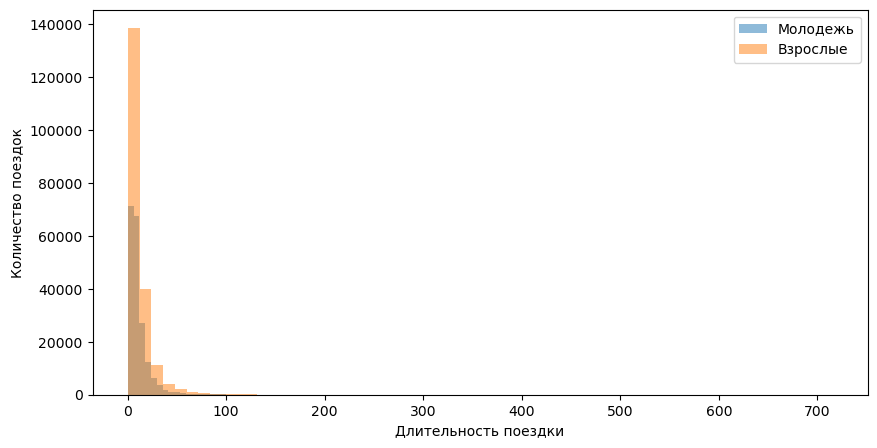

In [187]:
# Гистограмма распределений
plt.figure(figsize=(10, 5))

plt.hist(youth,
         bins=60,
         alpha=0.5,
         label='Молодежь')

plt.hist(adults,
         bins=60,
         alpha=0.5,
         label='Взрослые')

plt.xlabel('Длительность поездки')
plt.ylabel('Количество поездок')
plt.legend()

plt.show()

In [201]:
# Проверим гипотезы с помощью теста Манна-Уитни, так распределение ассиметрично
stat, p_value = stats.mannwhitneyu(youth, adults)

if p_value < alpha:
    print(f'Результат U-теста: U = {stat}. Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.')
else:
    print(f'Результат U-теста: U = {stat}. Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.')

Результат U-теста: U = 20129348459.5. Полученное значение p_value=1.1772082904400055e-96 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.


### 6.4 Вывод о различие времени поездок между возростными группами

H0 отвергается и принимается альтернативная гипотеза H1: существует статистически значимая разница в средней времени поездок у молодежи и взрослых (U-статистика: 20129348459.5, p-value: p_value=1.177e-96).

## 7 Итоговый вывод по проделанной работе

В ходе разведочного анализа данных "Поездки на самокатах Т-Банка" были исследованы и предобработаны исходные данные, после чего выявлены ключевые закономерности и получены инсайты, которые могут пригодиться для дальнейшего анализа.

**Основные результаты:**

1) Характер поездок:

    - Большинство поездок короткие (5–20 минут) и недорогие (50–150 рублей).
    - Медианная длительность — 7.78 мин, медианная стоимость — 103.94 руб.
    - Обнаружены аномалии: поездки длительностью > 200 мин и стоимостью > 750 руб.

2) Факторы стоимости:

    - Сильная зависимость цены от времени (коэффициент корреляции Пирсона 0.94).
    - Слабая связь с километражем.

Это указывает на то, что тарифная политика компании зависит от времени аренды и не учитывает пройденное расстояние

3) Проверенные гипотез:

    - Гипотеза: Длительность поездок в выходные vs будни

        H0: Поездки в выходные и будни не различаются по длительности (mu1 = mu2).

        H1: Поездки в выходные длиннее (mu1 > mu2).

        Результат:

        p-value < 0.05

        Вывод: Гипотеза H1 подтверждена. Поездки в выходные статистически значимо длиннее. В среднем разница составляет 1.84 мин.

    - Гипотеза 5.2 (Длительность поездок у молодежи vs взрослых):

        H0: Молодежь (до 30 включительно) и взрослые (30+) ездят одинаково долго (mu1 = mu2).

        H1: Существует статистически значимая разница в средней времени поездок у молодежи и взрослых. mu1 ≠ mu2.

        Результат:

        p-value < 0.05

        Вывод: H0 отвергается и принимается альтернативная гипотеза H1: существует статистически значимая разница в средней времени поездок у молодежи и взрослых 

4) Портрет пользователя:

    - Основная аудитория — люди в возрастном диапазоне от 18 до 45 лет. При этом мужчины в 4–5 раз активнее женщин.
    - Минимальная активность у подростков (до 18) и людей 60+.
    - В возрастной группе 60+ женщин больше, чем мужчин.

5) Региональные различия цены:

    - В Москве средняя цена 127.98р, в Санкт-Петербурге - 125.68р. Данные значения близки к общему среднему в 124.44р
    - В малых городах и регионах с менее развитым транспортом цена выше (150–175 руб).